## Exploratory Data Analysis (EDA) notebook

### Here we explore the provided dataset and we analyze some of it's statistical characteristics

In [1]:
import os

import copy

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import colorcet as cc

import warnings
warnings.filterwarnings("ignore")

In [2]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(14,8)})

### Loading datasets as Panda Dataframes from the correct path

In [3]:
dataset_names = ["ElBorn.csv", "LesCorts.csv", "PobleSec.csv"]
data_path = "../dataset"
datasets = [os.path.join(data_path, data_name) for data_name in dataset_names]

In [4]:
dfs = dict()
for data_name, data_path in zip(dataset_names, datasets):
    dfs[data_name] = pd.read_csv(data_path)

In [5]:
elborn = dfs["ElBorn.csv"]
lescorts = dfs["LesCorts.csv"]
poblesec = dfs["PobleSec.csv"]
elborn["time"] = pd.to_datetime(elborn["time"], format="%Y-%m-%d %H:%M:%S")
lescorts["time"] = pd.to_datetime(lescorts["time"], format="%Y-%m-%d %H:%M:%S")
poblesec["time"] = pd.to_datetime(poblesec["time"], format="%Y-%m-%d %H:%M:%S")

In [6]:
print(f"Elborn: {min(elborn['time'])}, {max(elborn['time'])}")
print(f"LesCorts: {min(lescorts['time'])}, {max(lescorts['time'])}")
print(f"PobleSec: {min(poblesec['time'])}, {max(poblesec['time'])}")

Elborn: 2018-03-28 15:56:00, 2018-04-03 11:38:00
LesCorts: 2019-01-12 17:12:00, 2019-01-22 06:54:00
PobleSec: 2018-02-05 23:40:00, 2018-02-28 02:32:00


In [7]:
elborn.set_index("time", inplace=True)
lescorts.set_index("time", inplace=True)
poblesec.set_index("time", inplace=True)

### The size and data form of each individual base station dataset

In [8]:
len(elborn), len(lescorts), len(poblesec)

(4192, 6892, 15927)

In [9]:
elborn.head()

,down,up,rnti_count,mcs_down,mcs_down_var,mcs_up,mcs_up_var,rb_down,rb_down_var,rb_up,rb_up_var
time,,,,,,,,,,,
2018-03-28 15:56:00,174876888.0,1856888.0,10229,15.332298,87.157688,14.981497,49.989484,0.029681,4.497698e-08,0.000541,3.143297e-08
2018-03-28 15:58:00,209054184.0,2866200.0,12223,15.116846,87.192168,16.432612,62.494670,0.035971,4.615535e-08,0.000852,4.439640e-08
2018-03-28 16:00:00,191464640.0,1935360.0,11152,15.215739,87.227955,15.885238,63.087007,0.032750,4.646104e-08,0.000607,2.993595e-08
2018-03-28 16:02:00,241515688.0,2991152.0,14040,15.135400,86.199501,15.714660,77.187459,0.041372,4.532153e-08,0.000925,5.382563e-08
2018-03-28 16:04:00,264131088.0,3288816.0,15247,15.188944,86.151119,15.414080,69.118561,0.045074,4.655543e-08,0.001021,5.922178e-08


In [10]:
lescorts.head()

,down,up,rnti_count,mcs_down,mcs_down_var,mcs_up,mcs_up_var,rb_down,rb_down_var,rb_up,rb_up_var
time,,,,,,,,,,,
2019-01-12 17:12:00,38490328.0,18729576.0,4495,2.573617,45.616769,13.382755,71.070384,0.013610,1.961025e-08,0.008342,1.083682e-08
2019-01-12 17:14:00,28093304.0,19340160.0,4277,2.104966,38.916538,14.779940,75.957494,0.012278,1.644211e-08,0.007040,1.061491e-08
2019-01-12 17:16:00,32971216.0,20630232.0,4729,2.452463,45.055805,14.624951,72.153009,0.013160,1.761309e-08,0.009001,9.109703e-09
2019-01-12 17:18:00,28745776.0,13323504.0,3924,2.072077,37.965933,13.979430,71.980549,0.012282,1.668480e-08,0.006028,5.813802e-09
2019-01-12 17:20:00,30887688.0,13812144.0,4099,2.241337,40.990956,13.314127,77.085867,0.012741,1.721707e-08,0.006706,7.246522e-09


In [11]:
poblesec.head()

,down,up,rnti_count,mcs_down,mcs_down_var,mcs_up,mcs_up_var,rb_down,rb_down_var,rb_up,rb_up_var
time,,,,,,,,,,,
2018-02-05 23:40:00,109934672.0,1166592.0,6490,15.223577,88.732975,16.210586,59.662387,0.019056,4.562405e-08,0.000374,2.175831e-08
2018-02-05 23:42:00,243427312.0,26819240.0,7517,11.186996,73.605480,11.916259,75.754176,0.068725,7.133122e-08,0.018590,1.462693e-08
2018-02-05 23:44:00,490090984.0,63040432.0,7264,6.090831,57.345857,10.949136,82.689403,0.183461,1.205626e-07,0.047671,1.348951e-08
2018-02-05 23:46:00,949030475.0,87122240.0,7865,7.744554,61.603081,12.121425,85.421994,0.384327,1.409946e-07,0.057338,1.295118e-08
2018-02-05 23:48:00,621928932.0,157533416.0,6325,6.256092,59.555113,13.200561,75.664978,0.156213,1.194070e-07,0.101680,3.385870e-08


### Up and Down Limits for each dataset

In [12]:
elborn.up.min(), elborn.down.min(),lescorts.up.min(), lescorts.down.min(),poblesec.up.min(), poblesec.down.min(),

(0.0, 5343912.0, 0.0, 0.0, 0.0, 8607664.0)

In [13]:
elborn.up.max(), elborn.down.max(),lescorts.up.max(), lescorts.down.max(),poblesec.up.max(), poblesec.down.max(),

(673330237.0,
 1886612321.0,
 1057884176.0,
 296757144.0,
 625382032.0,
 2286065520.0)

### Correlation Matrices

In [14]:
def cor_matrix(df):
    plt.figure(figsize=(18,8))
    sns.heatmap(df.corr(),annot=True,cmap='Greens',linewidths=0.2)
    plt.show()
    plt.close()

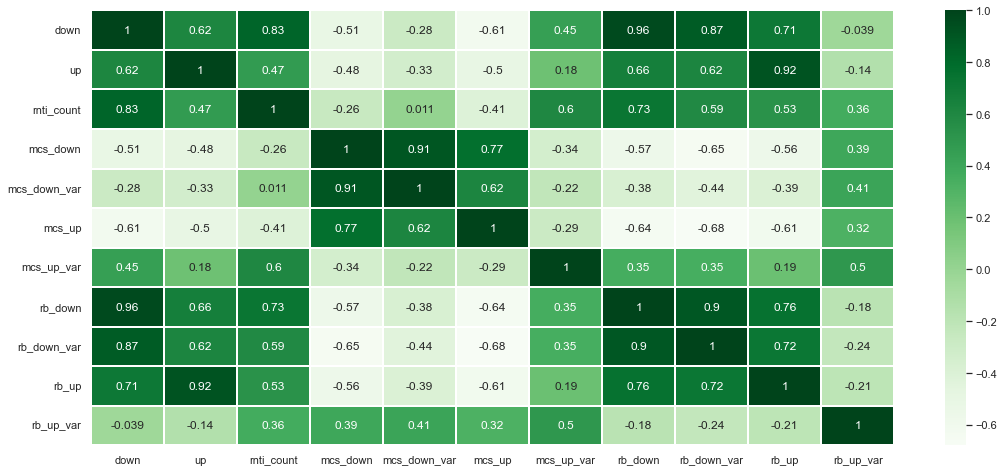

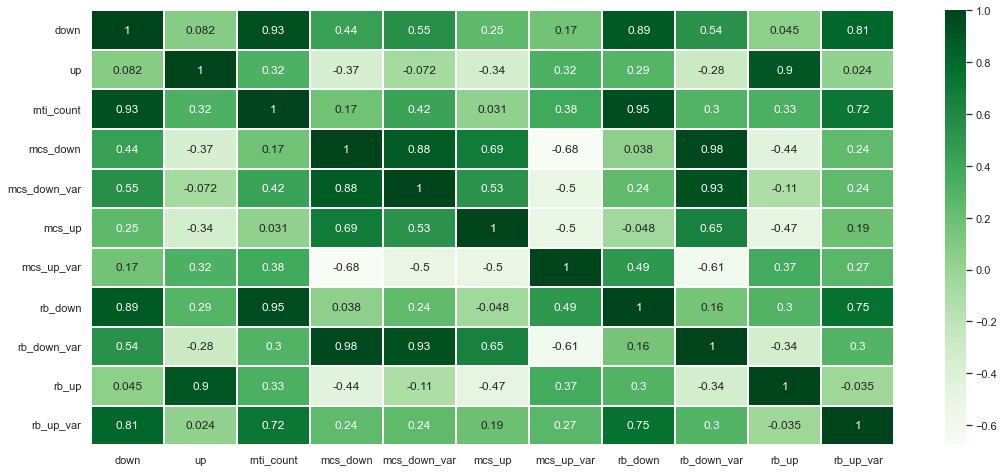

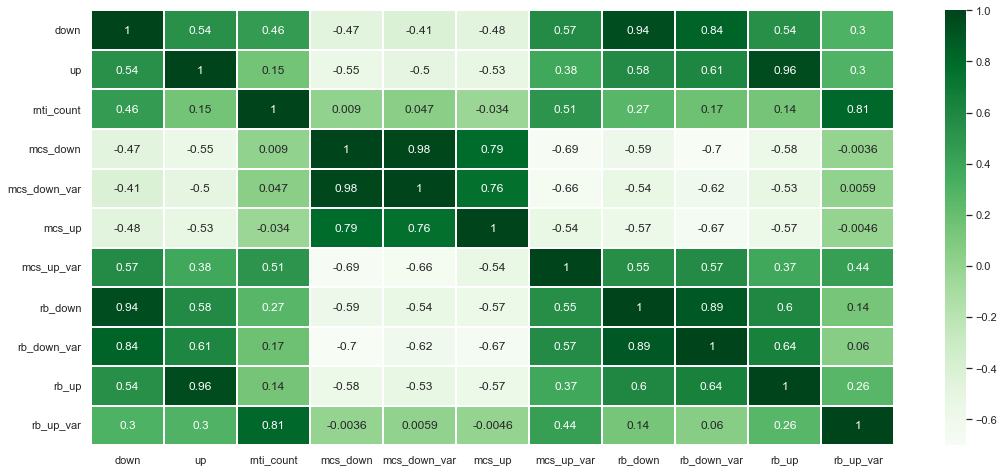

In [15]:
cor_matrix(elborn)
cor_matrix(lescorts)
cor_matrix(poblesec)

### 10 points rolling mean for every base station

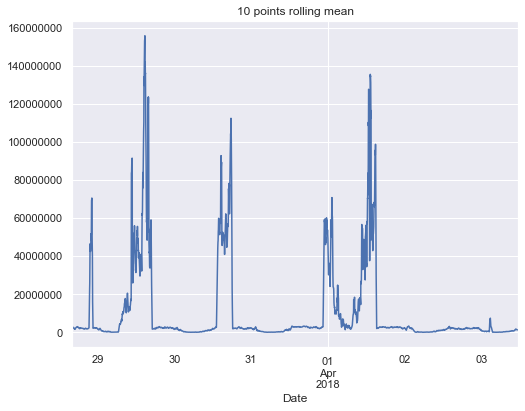

In [16]:
elborn_up_mean = elborn["up"].rolling(window=10).mean()
plt.ticklabel_format(style='plain')
ax = elborn_up_mean.plot(figsize=(8,6))
ax.set_xlabel("Date")
ax.set_title("10 points rolling mean")
plt.show()

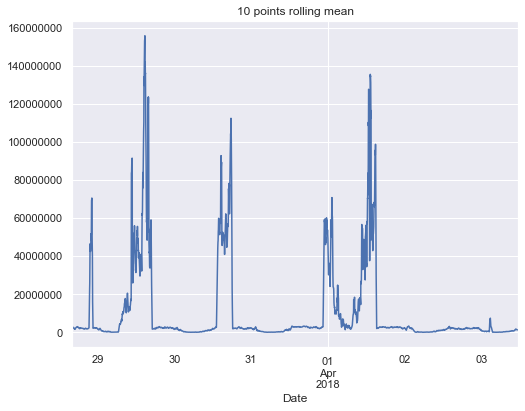

In [17]:
elborn_down_mean = elborn["down"].rolling(window=10).mean()
plt.ticklabel_format(style='plain')
ax = elborn_up_mean.plot(figsize=(8,6))
ax.set_xlabel("Date")
ax.set_title("10 points rolling mean")
plt.show()

### Seasonal Box Plot
Boxplot is a method for graphically demonstrating the locality, spread and skewness groups of numerical data through their quartiles. We create boxplots for every hour in order to examine how every base station statistically correlates with each other.

In [18]:
def seasonal_box_plot(df, column):
    tmp = copy.deepcopy(df)
    tmp["day"] = tmp.index.dayofyear
    tmp["hour"] = tmp.index.hour
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.ticklabel_format(style='plain')
    
    palette = sns.color_palette(cc.glasbey, n_colors=tmp.day.nunique())
    
    sns.boxplot(x=tmp['hour'], y=tmp[column])
    ax.set_title('', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
    ax.set_xlabel('Hour', fontsize = 16, fontdict=dict(weight='bold'))
    ax.set_ylabel('', fontsize = 16, fontdict=dict(weight='bold'))
    plt.show()
    plt.close()

In [19]:
elborn

,down,up,rnti_count,mcs_down,mcs_down_var,mcs_up,mcs_up_var,rb_down,rb_down_var,rb_up,rb_up_var
time,,,,,,,,,,,
2018-03-28 15:56:00,174876888.0,1856888.0,10229,15.332298,87.157688,14.981497,49.989484,0.029681,4.497698e-08,0.000541,3.143297e-08
2018-03-28 15:58:00,209054184.0,2866200.0,12223,15.116846,87.192168,16.432612,62.494670,0.035971,4.615535e-08,0.000852,4.439640e-08
2018-03-28 16:00:00,191464640.0,1935360.0,11152,15.215739,87.227955,15.885238,63.087007,0.032750,4.646104e-08,0.000607,2.993595e-08
2018-03-28 16:02:00,241515688.0,2991152.0,14040,15.135400,86.199501,15.714660,77.187459,0.041372,4.532153e-08,0.000925,5.382563e-08
2018-03-28 16:04:00,264131088.0,3288816.0,15247,15.188944,86.151119,15.414080,69.118561,0.045074,4.655543e-08,0.001021,5.922178e-08
...,...,...,...,...,...,...,...,...,...,...,...
2018-04-03 11:30:00,128110784.0,1088280.0,7758,14.980204,86.783498,14.489431,35.620732,0.021526,4.404124e-08,0.000380,1.945518e-08
2018-04-03 11:32:00,151273208.0,1283992.0,9103,15.013859,87.903331,16.019702,42.272334,0.025785,4.499877e-08,0.000444,2.165493e-08
2018-04-03 11:34:00,149891584.0,1222184.0,8923,15.202415,86.370911,16.476345,34.919566,0.025406,4.622009e-08,0.000373,1.820744e-08


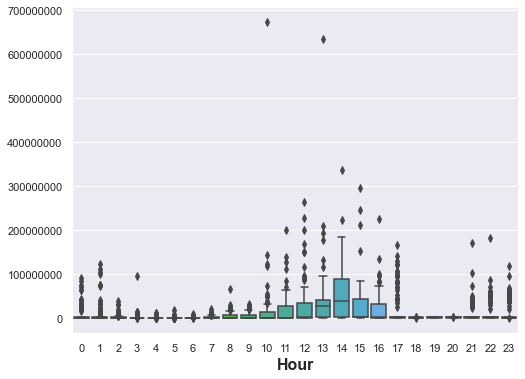

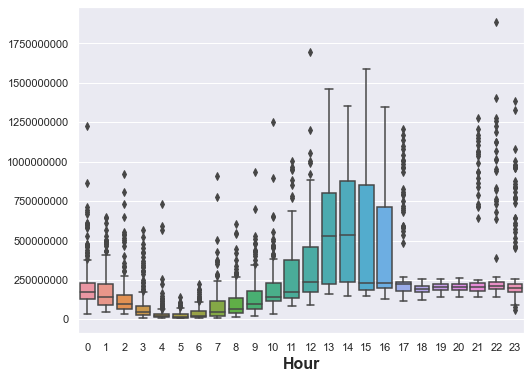

In [20]:
seasonal_box_plot(elborn, "up")
seasonal_box_plot(elborn, "down")

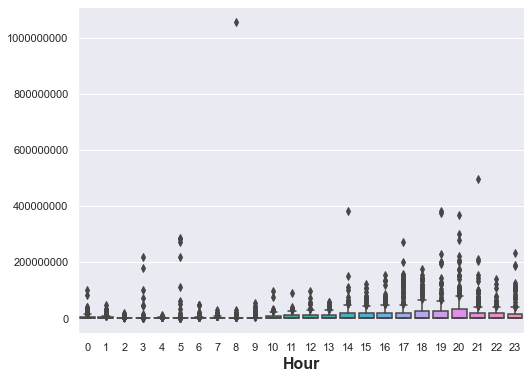

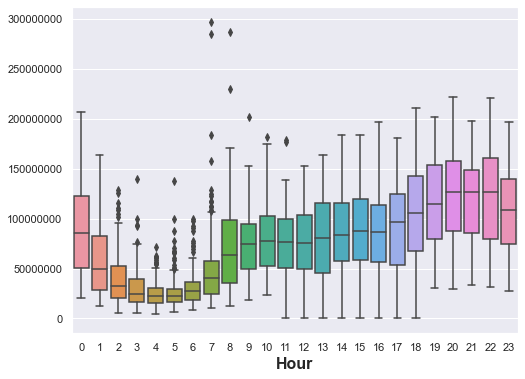

In [21]:
seasonal_box_plot(lescorts, "up")
seasonal_box_plot(lescorts, "down")

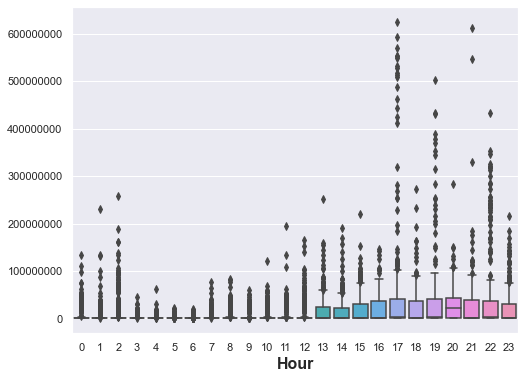

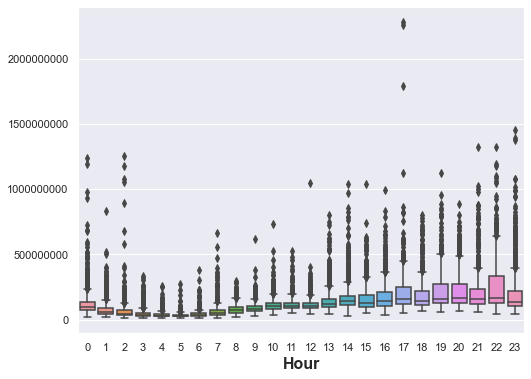

In [22]:
seasonal_box_plot(poblesec, "up")
seasonal_box_plot(poblesec, "down")

### Concatenate datasets from every base station together

In [23]:
elborn["District"] = "ElBorn"
lescorts["District"] = "LesCorts"
poblesec["District"] = "PobleSec"

In [24]:
full_df = pd.concat([elborn, lescorts, poblesec], ignore_index=True)

In [25]:
full_df.groupby(['District']).min()

,down,up,rnti_count,mcs_down,mcs_down_var,mcs_up,mcs_up_var,rb_down,rb_down_var,rb_up,rb_up_var
District,,,,,,,,,,,
ElBorn,5343912.0,0.0,346,1.932214,33.657205,0.0,0.0,0.000870,1.820459e-08,0.0,0.0
LesCorts,0.0,0.0,0,0.693584,13.817340,0.0,0.0,0.000791,1.144174e-08,0.0,0.0
PobleSec,8607664.0,0.0,564,0.862990,15.186916,0.0,0.0,0.001512,2.313469e-08,0.0,0.0


In [26]:
full_df.groupby(['District']).max()

,down,up,rnti_count,mcs_down,mcs_down_var,mcs_up,mcs_up_var,rb_down,rb_down_var,rb_up,rb_up_var
District,,,,,,,,,,,
ElBorn,1.886612e+09,6.733302e+08,43725,16.533289,100.846553,31.0,241.00,0.670594,1.583489e-07,0.223608,6.809028e-08
LesCorts,2.967571e+08,1.057884e+09,21353,16.155172,99.253090,31.0,147.70,0.124098,5.216144e-08,0.231391,9.397202e-08
PobleSec,2.286066e+09,6.253820e+08,16187,16.188952,96.942139,30.5,182.25,0.739830,1.802371e-07,0.445811,1.026170e-07


In [27]:
full_df.groupby(['District']).mean()

,down,up,rnti_count,mcs_down,mcs_down_var,mcs_up,mcs_up_var,rb_down,rb_down_var,rb_up,rb_up_var
District,,,,,,,,,,,
ElBorn,2.304711e+08,1.053930e+07,9560.875000,12.963196,81.076624,13.776877,53.965261,0.060201,5.374642e-08,0.007625,2.117351e-08
LesCorts,7.603240e+07,9.762884e+06,5087.726494,11.074862,76.189917,13.990400,51.837415,0.016065,3.740944e-08,0.005783,1.350593e-08
PobleSec,1.342492e+08,1.215092e+07,5429.024550,12.467151,77.373617,13.938111,46.653447,0.037556,5.664851e-08,0.009165,1.244179e-08


In [28]:
full_df.groupby(['District']).median()

,down,up,rnti_count,mcs_down,mcs_down_var,mcs_up,mcs_up_var,rb_down,rb_down_var,rb_up,rb_up_var
District,,,,,,,,,,,
ElBorn,179581345.0,2034188.0,9978.5,15.138282,86.677744,15.030754,60.936729,0.032134,4.588089e-08,0.000669,1.479337e-08
LesCorts,68367388.0,1240148.0,4977.5,15.028553,86.787707,14.653389,53.687315,0.015771,4.451692e-08,0.000425,1.025729e-08
PobleSec,102713728.0,933624.0,5543.0,15.111972,86.726397,14.864709,46.628078,0.018391,4.527324e-08,0.000298,1.026050e-08
